In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

C:\Users\poulr\Anaconda32\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.random.seed(7)
data = pd.read_csv('beacon.csv',engine='python')
data.head(5)

,steps,x,y,Beacon1,Beacon2,Beacon3,Beacon4,Beacon5,Beacon6,Beacon7
0,1,5.0,6.5,-66,-67,-81,-77,-87,-85,-82
1,2,5.0,6.6,-71,-80,-73,-64,-61,-73,-82
2,3,5.0,6.7,-72,-68,-79,-78,-78,-75,-67
3,4,5.0,6.8,-84,-71,-72,-69,-65,-76,-72
4,5,5.0,6.9,-74,-87,-74,-67,-65,-70,-73


In [3]:
def l2_dist(p1, p2):
    x1,y1 = p1
    x2,y2 = p2
    x1, y1 = np.array(x1), np.array(y1)
    x2, y2 = np.array(x2), np.array(y2)
    dx = x1 - x2
    dy = y1 - y2
    dx = dx ** 2
    dy = dy ** 2
    dists = dx + dy
    dists = np.sqrt(dists)
    return np.mean(dists), dists

In [4]:
beacon_values = data.iloc[:,3:]
beacon_values

,Beacon1,Beacon2,Beacon3,Beacon4,Beacon5,Beacon6,Beacon7
0,-66,-67,-81,-77,-87,-85,-82
1,-71,-80,-73,-64,-61,-73,-82
2,-72,-68,-79,-78,-78,-75,-67
3,-84,-71,-72,-69,-65,-76,-72
4,-74,-87,-74,-67,-65,-70,-73
...,...,...,...,...,...,...,...
1911,-79,-80,-84,-83,-72,-59,-62
1912,-76,-79,-81,-90,-77,-58,-61
1913,-75,-84,-74,-88,-80,-60,-58
1914,-83,-87,-86,-84,-81,-65,-58


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

beacon_values = data.iloc[:,3:].values
print(data.shape)
from sklearn.model_selection import train_test_split
X = data.iloc[:,3:]
# print(X)
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaler = scaler.fit_transform(X)
y=data.iloc[:,1:3]
print(X_scaler)
coordinates=data.iloc[:,1:3].values 

X_train, X_test, Y_train, Y_test = train_test_split(X, coordinates, test_size=0.2, random_state=42)


(1916, 10)
[[0.65384615 0.75       0.38297872 ... 0.22       0.29545455 0.32075472]
 [0.55769231 0.45454545 0.55319149 ... 0.74       0.56818182 0.32075472]
 [0.53846154 0.72727273 0.42553191 ... 0.4        0.52272727 0.60377358]
 ...
 [0.48076923 0.36363636 0.53191489 ... 0.36       0.86363636 0.77358491]
 [0.32692308 0.29545455 0.27659574 ... 0.34       0.75       0.77358491]
 [0.53846154 0.29545455 0.4893617  ... 0.34       0.95454545 0.62264151]]


In [6]:
X_train.shape
Y_train.shape

(1532, 2)

In [7]:
X_train.shape

(1532, 7)

In [8]:
import keras 
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.layers import LSTM, Input
from keras.models import Model


#def create_deep(inp_dim):
    #seed = 7
    #np.random.seed(seed)
model = Sequential()
model.add(Dense(100, input_dim=7,activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='relu'))
    # Compile model
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='mse', optimizer=adam, metrics=['mse'])
#eturn model

es = EarlyStopping(monitor='val_loss', patience=600, verbose=2, mode='auto', restore_best_weights=True)
#model = create_deep(X_train.shape[1])
hist = model.fit(x = X_train, y = Y_train, validation_data = (X_test,Y_test), epochs=200, batch_size=12,  verbose=2, callbacks = [es])

W0419 20:01:32.427647 19356 deprecation_wrapper.py:119] From C:\Users\poulr\Anaconda32\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0419 20:01:32.522589 19356 deprecation_wrapper.py:119] From C:\Users\poulr\Anaconda32\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0419 20:01:32.546499 19356 deprecation_wrapper.py:119] From C:\Users\poulr\Anaconda32\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0419 20:01:32.762586 19356 deprecation_wrapper.py:119] From C:\Users\poulr\Anaconda32\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0419 20:01:32.906867 19356 deprecation_wr

Train on 1532 samples, validate on 384 samples
Epoch 1/200
 - 2s - loss: 16.8209 - mean_squared_error: 16.8209 - val_loss: 11.7688 - val_mean_squared_error: 11.7688
Epoch 2/200
 - 0s - loss: 9.2662 - mean_squared_error: 9.2662 - val_loss: 9.6786 - val_mean_squared_error: 9.6786
Epoch 3/200
 - 0s - loss: 9.1411 - mean_squared_error: 9.1411 - val_loss: 9.3062 - val_mean_squared_error: 9.3062
Epoch 4/200
 - 0s - loss: 9.0281 - mean_squared_error: 9.0281 - val_loss: 9.1151 - val_mean_squared_error: 9.1151
Epoch 5/200
 - 1s - loss: 8.7440 - mean_squared_error: 8.7440 - val_loss: 9.0591 - val_mean_squared_error: 9.0591
Epoch 6/200
 - 1s - loss: 8.9765 - mean_squared_error: 8.9765 - val_loss: 9.6501 - val_mean_squared_error: 9.6501
Epoch 7/200
 - 1s - loss: 8.7589 - mean_squared_error: 8.7589 - val_loss: 9.6725 - val_mean_squared_error: 9.6725
Epoch 8/200
 - 1s - loss: 8.6983 - mean_squared_error: 8.6983 - val_loss: 9.2055 - val_mean_squared_error: 9.2055
Epoch 9/200
 - 1s - loss: 8.6903 - me

Epoch 72/200
 - 1s - loss: 7.9006 - mean_squared_error: 7.9006 - val_loss: 9.5121 - val_mean_squared_error: 9.5121
Epoch 73/200
 - 0s - loss: 8.1773 - mean_squared_error: 8.1773 - val_loss: 11.1084 - val_mean_squared_error: 11.1084
Epoch 74/200
 - 1s - loss: 8.0010 - mean_squared_error: 8.0010 - val_loss: 9.1105 - val_mean_squared_error: 9.1105
Epoch 75/200
 - 0s - loss: 8.0986 - mean_squared_error: 8.0986 - val_loss: 9.4767 - val_mean_squared_error: 9.4767
Epoch 76/200
 - 1s - loss: 8.1329 - mean_squared_error: 8.1329 - val_loss: 8.6980 - val_mean_squared_error: 8.6980
Epoch 77/200
 - 1s - loss: 7.8879 - mean_squared_error: 7.8879 - val_loss: 9.1540 - val_mean_squared_error: 9.1540
Epoch 78/200
 - 1s - loss: 7.9814 - mean_squared_error: 7.9814 - val_loss: 10.0724 - val_mean_squared_error: 10.0724
Epoch 79/200
 - 0s - loss: 8.0015 - mean_squared_error: 8.0015 - val_loss: 9.1403 - val_mean_squared_error: 9.1403
Epoch 80/200
 - 0s - loss: 8.0381 - mean_squared_error: 8.0381 - val_loss: 9

Epoch 143/200
 - 1s - loss: 7.7981 - mean_squared_error: 7.7981 - val_loss: 8.7350 - val_mean_squared_error: 8.7350
Epoch 144/200
 - 1s - loss: 7.7822 - mean_squared_error: 7.7822 - val_loss: 12.1428 - val_mean_squared_error: 12.1428
Epoch 145/200
 - 1s - loss: 7.7939 - mean_squared_error: 7.7939 - val_loss: 8.7910 - val_mean_squared_error: 8.7910
Epoch 146/200
 - 1s - loss: 7.8047 - mean_squared_error: 7.8047 - val_loss: 8.9875 - val_mean_squared_error: 8.9875
Epoch 147/200
 - 1s - loss: 7.8580 - mean_squared_error: 7.8580 - val_loss: 9.0054 - val_mean_squared_error: 9.0054
Epoch 148/200
 - 1s - loss: 7.8297 - mean_squared_error: 7.8297 - val_loss: 10.1866 - val_mean_squared_error: 10.1866
Epoch 149/200
 - 0s - loss: 7.8137 - mean_squared_error: 7.8137 - val_loss: 8.7834 - val_mean_squared_error: 8.7834
Epoch 150/200
 - 0s - loss: 7.9331 - mean_squared_error: 7.9331 - val_loss: 10.3923 - val_mean_squared_error: 10.3923
Epoch 151/200
 - 1s - loss: 7.8487 - mean_squared_error: 7.8487 - 

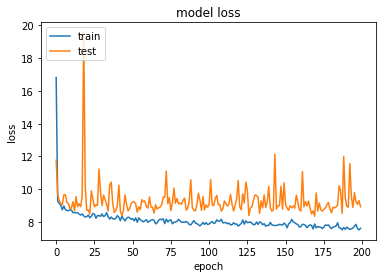

In [9]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:

preds = model.predict(X_test)
l2dists_mean, l2dists = l2_dist((preds[:, 0], preds[:, 1]), (Y_test[:, 0] , Y_test[:, 0]))
print(l2dists_mean)

4.377418964260902


In [11]:
preds = model.predict(X_test)

preds.shape

(384, 2)

In [12]:
Y_test.shape

(384, 2)

In [13]:
from sklearn.model_selection import KFold 
import keras 
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.layers import LSTM, Input
from keras.models import Model

scores = []
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    model = Sequential()
    model.add(Dense(100, input_dim=7,activation='sigmoid'))
    model.add(BatchNormalization())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='relu'))
    # Compile model
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split = 0.2, verbose=2)
    ron =model.predict(X_test)
    lol = pd.DataFrame(ron)
    lol = lol.rename(columns={0:'a',1:'b'})
    actual_1=pd.DataFrame(np.array(y_test).T)
    actual = actual_1.T
    actual = actual.rename(columns={0:'x',1:'y'})
    actual['a']=lol['a']
    actual['b'] = lol['b']
    actual['distance']=np.sqrt((actual['x']-actual['a'])**2+(actual['y']-actual['b'])**2)
    mean = actual['distance'].mean()
    scores.append(mean)

Train Index:  [ 192  193  194 ... 1913 1914 1915] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191]


C:\Users\poulr\Anaconda32\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Train on 1379 samples, validate on 345 samples
Epoch 1/200
 - 1s - loss: 18.9992 - val_loss: 15.8366
Epoch 2/200
 - 0s - loss: 7.8030 - val_loss: 11.8198
Epoch 3/200
 - 0s - loss: 7.2932 - val_loss: 11.9677
Epoch 4/200
 - 0s - loss: 7.2584 - val_loss: 11.8440
Epoch 5/200
 - 0s - loss: 7.1192 - val_loss: 11.5756
Epoch 6/200
 - 0s - loss: 7.1552 - val_loss: 11.6076
Epoch 7/200
 - 0s - loss: 7.1063 - val_loss: 12.0144
Epoch 8/200
 - 0s - loss: 6.9894 - val_loss: 12.2537
Epoch 9/200
 - 0s - loss: 6.9008 - val_loss: 11.4826
Epoch 10/200
 - 0s - loss: 6.9539 - val_loss: 11.4170
Epoch 11/200
 - 0s - loss: 7.0133 - val_loss: 11.8644
Epoch 12/200
 - 0s - loss: 6.9374 - val_loss: 10.6475
Epoch 13/200
 - 0s - loss: 6.9543 - val_loss: 10.9219
Epoch 14/200
 - 0s - loss: 6.8967 - val_loss: 11.3516
Epoch 15/200
 - 0s - loss: 6.9406 - val_loss: 11.4742
Epoch 16/200
 - 0s - loss: 6.7788 - val_loss: 11.0619
Epoch 17/200
 - 0s - loss: 6.8130 - val_loss: 12.0229
Epoch 18/200
 - 0s - loss: 6.8830 - val_los

 - 0s - loss: 5.5485 - val_loss: 12.0422
Epoch 152/200
 - 0s - loss: 5.5487 - val_loss: 11.3985
Epoch 153/200
 - 0s - loss: 5.8235 - val_loss: 12.2861
Epoch 154/200
 - 0s - loss: 5.5506 - val_loss: 12.1573
Epoch 155/200
 - 0s - loss: 5.5342 - val_loss: 11.6068
Epoch 156/200
 - 0s - loss: 5.4850 - val_loss: 11.1841
Epoch 157/200
 - 0s - loss: 5.4888 - val_loss: 11.3623
Epoch 158/200
 - 0s - loss: 5.5097 - val_loss: 10.8314
Epoch 159/200
 - 0s - loss: 5.4215 - val_loss: 12.0344
Epoch 160/200
 - 0s - loss: 5.6251 - val_loss: 11.8330
Epoch 161/200
 - 0s - loss: 5.4338 - val_loss: 12.0330
Epoch 162/200
 - 0s - loss: 5.5492 - val_loss: 11.4938
Epoch 163/200
 - 0s - loss: 5.4687 - val_loss: 13.0914
Epoch 164/200
 - 0s - loss: 5.4877 - val_loss: 12.2633
Epoch 165/200
 - 0s - loss: 5.5861 - val_loss: 12.0590
Epoch 166/200
 - 0s - loss: 5.4805 - val_loss: 11.4724
Epoch 167/200
 - 0s - loss: 5.5411 - val_loss: 12.7673
Epoch 168/200
 - 0s - loss: 5.4926 - val_loss: 11.7099
Epoch 169/200
 - 0s - lo

Epoch 86/200
 - 0s - loss: 7.2486 - val_loss: 11.5552
Epoch 87/200
 - 0s - loss: 7.0216 - val_loss: 12.5463
Epoch 88/200
 - 0s - loss: 7.1592 - val_loss: 11.7575
Epoch 89/200
 - 0s - loss: 7.2296 - val_loss: 12.0098
Epoch 90/200
 - 0s - loss: 7.3558 - val_loss: 12.1870
Epoch 91/200
 - 0s - loss: 7.2137 - val_loss: 11.3591
Epoch 92/200
 - 0s - loss: 7.2221 - val_loss: 11.4797
Epoch 93/200
 - 0s - loss: 7.2629 - val_loss: 11.6999
Epoch 94/200
 - 0s - loss: 7.2611 - val_loss: 11.6940
Epoch 95/200
 - 0s - loss: 7.2942 - val_loss: 11.4993
Epoch 96/200
 - 0s - loss: 7.1728 - val_loss: 11.7019
Epoch 97/200
 - 0s - loss: 7.0874 - val_loss: 10.9072
Epoch 98/200
 - 0s - loss: 7.2878 - val_loss: 11.6024
Epoch 99/200
 - 0s - loss: 7.0813 - val_loss: 11.8501
Epoch 100/200
 - 0s - loss: 7.0236 - val_loss: 12.4061
Epoch 101/200
 - 0s - loss: 7.4065 - val_loss: 12.5306
Epoch 102/200
 - 0s - loss: 7.1571 - val_loss: 11.9465
Epoch 103/200
 - 0s - loss: 7.1906 - val_loss: 11.9035
Epoch 104/200
 - 0s - lo

Epoch 20/200
 - 0s - loss: 7.9038 - val_loss: 12.1092
Epoch 21/200
 - 0s - loss: 7.6142 - val_loss: 11.5130
Epoch 22/200
 - 0s - loss: 7.8982 - val_loss: 11.7387
Epoch 23/200
 - 0s - loss: 7.6248 - val_loss: 12.0563
Epoch 24/200
 - 0s - loss: 7.7440 - val_loss: 12.6393
Epoch 25/200
 - 0s - loss: 7.8384 - val_loss: 11.6989
Epoch 26/200
 - 0s - loss: 7.6951 - val_loss: 11.6354
Epoch 27/200
 - 0s - loss: 7.6398 - val_loss: 11.6961
Epoch 28/200
 - 0s - loss: 7.5927 - val_loss: 11.6778
Epoch 29/200
 - 0s - loss: 7.6454 - val_loss: 12.7575
Epoch 30/200
 - 0s - loss: 7.3997 - val_loss: 12.0177
Epoch 31/200
 - 0s - loss: 7.7018 - val_loss: 12.1922
Epoch 32/200
 - 0s - loss: 7.3956 - val_loss: 11.3522
Epoch 33/200
 - 0s - loss: 7.7029 - val_loss: 11.8134
Epoch 34/200
 - 0s - loss: 7.4871 - val_loss: 11.4883
Epoch 35/200
 - 0s - loss: 7.4973 - val_loss: 11.7343
Epoch 36/200
 - 0s - loss: 7.4715 - val_loss: 11.9796
Epoch 37/200
 - 0s - loss: 7.3875 - val_loss: 11.9251
Epoch 38/200
 - 0s - loss: 7

Epoch 171/200
 - 0s - loss: 6.7445 - val_loss: 11.8181
Epoch 172/200
 - 0s - loss: 6.5440 - val_loss: 11.1644
Epoch 173/200
 - 0s - loss: 6.4405 - val_loss: 12.6681
Epoch 174/200
 - 0s - loss: 6.4991 - val_loss: 12.1066
Epoch 175/200
 - 0s - loss: 6.5017 - val_loss: 11.6312
Epoch 176/200
 - 0s - loss: 6.5320 - val_loss: 11.8420
Epoch 177/200
 - 0s - loss: 6.4628 - val_loss: 11.7209
Epoch 178/200
 - 0s - loss: 6.4204 - val_loss: 11.9031
Epoch 179/200
 - 0s - loss: 6.5930 - val_loss: 12.9258
Epoch 180/200
 - 0s - loss: 6.3874 - val_loss: 12.3354
Epoch 181/200
 - 0s - loss: 6.5214 - val_loss: 12.9905
Epoch 182/200
 - 0s - loss: 6.3056 - val_loss: 12.1134
Epoch 183/200
 - 0s - loss: 6.4510 - val_loss: 13.1056
Epoch 184/200
 - 0s - loss: 6.2813 - val_loss: 12.8456
Epoch 185/200
 - 0s - loss: 6.2780 - val_loss: 11.6893
Epoch 186/200
 - 0s - loss: 6.3175 - val_loss: 11.9654
Epoch 187/200
 - 0s - loss: 6.5478 - val_loss: 11.7828
Epoch 188/200
 - 0s - loss: 6.2919 - val_loss: 11.9122
Epoch 189/

Epoch 106/200
 - 0s - loss: 5.7853 - val_loss: 14.2302
Epoch 107/200
 - 0s - loss: 5.8714 - val_loss: 12.5613
Epoch 108/200
 - 0s - loss: 5.8174 - val_loss: 12.8837
Epoch 109/200
 - 0s - loss: 5.8972 - val_loss: 12.4130
Epoch 110/200
 - 0s - loss: 6.0055 - val_loss: 13.1285
Epoch 111/200
 - 0s - loss: 5.7849 - val_loss: 13.9691
Epoch 112/200
 - 0s - loss: 5.6955 - val_loss: 13.1061
Epoch 113/200
 - 0s - loss: 5.7359 - val_loss: 13.5663
Epoch 114/200
 - 0s - loss: 5.6831 - val_loss: 11.8140
Epoch 115/200
 - 0s - loss: 5.8210 - val_loss: 12.9639
Epoch 116/200
 - 0s - loss: 5.7756 - val_loss: 12.5208
Epoch 117/200
 - 0s - loss: 5.8349 - val_loss: 13.0979
Epoch 118/200
 - 0s - loss: 5.8364 - val_loss: 12.2409
Epoch 119/200
 - 0s - loss: 5.8255 - val_loss: 12.4071
Epoch 120/200
 - 0s - loss: 5.9095 - val_loss: 12.1927
Epoch 121/200
 - 0s - loss: 5.7754 - val_loss: 12.6859
Epoch 122/200
 - 0s - loss: 5.9363 - val_loss: 13.4961
Epoch 123/200
 - 0s - loss: 5.8520 - val_loss: 12.5761
Epoch 124/

Epoch 40/200
 - 0s - loss: 6.9987 - val_loss: 12.3499
Epoch 41/200
 - 0s - loss: 6.9493 - val_loss: 13.4522
Epoch 42/200
 - 0s - loss: 6.9649 - val_loss: 11.9480
Epoch 43/200
 - 0s - loss: 6.9879 - val_loss: 12.6454
Epoch 44/200
 - 0s - loss: 7.0645 - val_loss: 12.4358
Epoch 45/200
 - 0s - loss: 6.9037 - val_loss: 11.7279
Epoch 46/200
 - 0s - loss: 7.0026 - val_loss: 12.2957
Epoch 47/200
 - 0s - loss: 6.8603 - val_loss: 13.0965
Epoch 48/200
 - 0s - loss: 6.9535 - val_loss: 11.9635
Epoch 49/200
 - 0s - loss: 6.9830 - val_loss: 13.1227
Epoch 50/200
 - 0s - loss: 6.9481 - val_loss: 12.4839
Epoch 51/200
 - 0s - loss: 6.9012 - val_loss: 12.1466
Epoch 52/200
 - 0s - loss: 6.8753 - val_loss: 12.7020
Epoch 53/200
 - 0s - loss: 7.0342 - val_loss: 12.4659
Epoch 54/200
 - 0s - loss: 6.8070 - val_loss: 12.0358
Epoch 55/200
 - 0s - loss: 6.7413 - val_loss: 12.7111
Epoch 56/200
 - 0s - loss: 6.8259 - val_loss: 12.2982
Epoch 57/200
 - 0s - loss: 6.9597 - val_loss: 12.0440
Epoch 58/200
 - 0s - loss: 6

 - 0s - loss: 5.6880 - val_loss: 13.9205
Epoch 191/200
 - 0s - loss: 6.0959 - val_loss: 12.3049
Epoch 192/200
 - 0s - loss: 5.9232 - val_loss: 13.6057
Epoch 193/200
 - 0s - loss: 6.0987 - val_loss: 12.7038
Epoch 194/200
 - 0s - loss: 5.9056 - val_loss: 12.5617
Epoch 195/200
 - 0s - loss: 5.6366 - val_loss: 12.3934
Epoch 196/200
 - 0s - loss: 5.5269 - val_loss: 11.9326
Epoch 197/200
 - 0s - loss: 5.6807 - val_loss: 12.0683
Epoch 198/200
 - 0s - loss: 5.9224 - val_loss: 11.9317
Epoch 199/200
 - 0s - loss: 5.7105 - val_loss: 12.5338
Epoch 200/200
 - 0s - loss: 5.8325 - val_loss: 11.9179
Train Index:  [   0    1    2 ... 1913 1914 1915] 

Test Index:  [ 960  961  962  963  964  965  966  967  968  969  970  971  972  973
  974  975  976  977  978  979  980  981  982  983  984  985  986  987
  988  989  990  991  992  993  994  995  996  997  998  999 1000 1001
 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015
 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027

Epoch 122/200
 - 0s - loss: 6.8867 - val_loss: 12.3027
Epoch 123/200
 - 0s - loss: 6.7089 - val_loss: 13.2030
Epoch 124/200
 - 0s - loss: 6.7372 - val_loss: 12.4243
Epoch 125/200
 - 0s - loss: 6.7048 - val_loss: 12.2779
Epoch 126/200
 - 0s - loss: 6.9618 - val_loss: 13.7234
Epoch 127/200
 - 0s - loss: 6.8239 - val_loss: 13.1776
Epoch 128/200
 - 0s - loss: 6.6969 - val_loss: 13.2360
Epoch 129/200
 - 0s - loss: 6.6856 - val_loss: 13.1873
Epoch 130/200
 - 0s - loss: 6.6844 - val_loss: 12.8193
Epoch 131/200
 - 0s - loss: 6.6480 - val_loss: 12.3021
Epoch 132/200
 - 0s - loss: 6.6145 - val_loss: 12.2700
Epoch 133/200
 - 0s - loss: 6.7804 - val_loss: 12.8983
Epoch 134/200
 - 0s - loss: 6.7608 - val_loss: 13.1611
Epoch 135/200
 - 0s - loss: 6.5954 - val_loss: 11.5125
Epoch 136/200
 - 0s - loss: 6.6991 - val_loss: 13.1918
Epoch 137/200
 - 0s - loss: 6.7976 - val_loss: 12.3477
Epoch 138/200
 - 0s - loss: 6.6480 - val_loss: 12.9438
Epoch 139/200
 - 0s - loss: 6.7031 - val_loss: 12.9854
Epoch 140/

Epoch 53/200
 - 0s - loss: 7.2734 - val_loss: 12.7359
Epoch 54/200
 - 0s - loss: 6.9746 - val_loss: 13.1019
Epoch 55/200
 - 0s - loss: 6.9998 - val_loss: 13.5052
Epoch 56/200
 - 0s - loss: 7.0916 - val_loss: 64.2435
Epoch 57/200
 - 0s - loss: 7.0357 - val_loss: 37.7737
Epoch 58/200
 - 0s - loss: 7.0589 - val_loss: 27.0382
Epoch 59/200
 - 0s - loss: 6.9242 - val_loss: 16.7209
Epoch 60/200
 - 0s - loss: 7.2742 - val_loss: 13.9171
Epoch 61/200
 - 0s - loss: 6.9974 - val_loss: 15.1369
Epoch 62/200
 - 0s - loss: 6.8340 - val_loss: 13.4547
Epoch 63/200
 - 0s - loss: 7.0655 - val_loss: 13.6694
Epoch 64/200
 - 0s - loss: 7.0634 - val_loss: 13.4224
Epoch 65/200
 - 0s - loss: 6.9364 - val_loss: 13.2920
Epoch 66/200
 - 0s - loss: 7.0425 - val_loss: 12.7038
Epoch 67/200
 - 0s - loss: 7.0893 - val_loss: 12.4594
Epoch 68/200
 - 0s - loss: 7.0733 - val_loss: 12.3336
Epoch 69/200
 - 0s - loss: 6.9122 - val_loss: 13.0122
Epoch 70/200
 - 0s - loss: 6.9292 - val_loss: 13.3244
Epoch 71/200
 - 0s - loss: 6

Train on 1380 samples, validate on 345 samples
Epoch 1/200
 - 2s - loss: 23.8386 - val_loss: 14.9457
Epoch 2/200
 - 0s - loss: 10.3749 - val_loss: 18.7080
Epoch 3/200
 - 0s - loss: 8.6398 - val_loss: 14.6966
Epoch 4/200
 - 0s - loss: 8.5116 - val_loss: 13.5301
Epoch 5/200
 - 0s - loss: 8.2593 - val_loss: 11.9569
Epoch 6/200
 - 0s - loss: 8.3373 - val_loss: 13.1139
Epoch 7/200
 - 0s - loss: 8.1920 - val_loss: 12.6637
Epoch 8/200
 - 0s - loss: 8.2239 - val_loss: 12.7841
Epoch 9/200
 - 0s - loss: 8.1821 - val_loss: 12.4148
Epoch 10/200
 - 0s - loss: 8.1497 - val_loss: 12.7917
Epoch 11/200
 - 0s - loss: 8.1031 - val_loss: 13.2253
Epoch 12/200
 - 0s - loss: 8.2117 - val_loss: 12.5317
Epoch 13/200
 - 0s - loss: 8.0841 - val_loss: 12.2016
Epoch 14/200
 - 0s - loss: 7.8799 - val_loss: 12.2596
Epoch 15/200
 - 0s - loss: 8.0208 - val_loss: 12.3053
Epoch 16/200
 - 0s - loss: 7.8593 - val_loss: 12.0672
Epoch 17/200
 - 0s - loss: 7.8715 - val_loss: 11.7315
Epoch 18/200
 - 0s - loss: 7.7937 - val_lo

 - 0s - loss: 6.5629 - val_loss: 12.9144
Epoch 152/200
 - 0s - loss: 6.4110 - val_loss: 11.7909
Epoch 153/200
 - 0s - loss: 6.5244 - val_loss: 13.3020
Epoch 154/200
 - 0s - loss: 6.5996 - val_loss: 12.2283
Epoch 155/200
 - 0s - loss: 6.4419 - val_loss: 12.2656
Epoch 156/200
 - 0s - loss: 6.5218 - val_loss: 12.4805
Epoch 157/200
 - 0s - loss: 6.3307 - val_loss: 12.5622
Epoch 158/200
 - 0s - loss: 6.4737 - val_loss: 12.9542
Epoch 159/200
 - 0s - loss: 6.3832 - val_loss: 12.1888
Epoch 160/200
 - 0s - loss: 6.6660 - val_loss: 12.7375
Epoch 161/200
 - 0s - loss: 6.5043 - val_loss: 12.5207
Epoch 162/200
 - 0s - loss: 6.4717 - val_loss: 14.2217
Epoch 163/200
 - 0s - loss: 6.7683 - val_loss: 12.0338
Epoch 164/200
 - 0s - loss: 6.5863 - val_loss: 13.0880
Epoch 165/200
 - 0s - loss: 6.4484 - val_loss: 12.8014
Epoch 166/200
 - 0s - loss: 6.4348 - val_loss: 12.5367
Epoch 167/200
 - 0s - loss: 6.4537 - val_loss: 12.8072
Epoch 168/200
 - 0s - loss: 6.2513 - val_loss: 12.8822
Epoch 169/200
 - 0s - lo

Epoch 84/200
 - 0s - loss: 7.0628 - val_loss: 7.9532
Epoch 85/200
 - 0s - loss: 7.1012 - val_loss: 8.4097
Epoch 86/200
 - 0s - loss: 7.1368 - val_loss: 7.6803
Epoch 87/200
 - 0s - loss: 7.1170 - val_loss: 8.8986
Epoch 88/200
 - 0s - loss: 7.1125 - val_loss: 7.7643
Epoch 89/200
 - 0s - loss: 6.9976 - val_loss: 8.1997
Epoch 90/200
 - 0s - loss: 7.1848 - val_loss: 8.8981
Epoch 91/200
 - 0s - loss: 7.1568 - val_loss: 8.2762
Epoch 92/200
 - 0s - loss: 7.0906 - val_loss: 8.0531
Epoch 93/200
 - 0s - loss: 7.0802 - val_loss: 9.6231
Epoch 94/200
 - 0s - loss: 7.3964 - val_loss: 10.7806
Epoch 95/200
 - 0s - loss: 7.1172 - val_loss: 6.7406
Epoch 96/200
 - 0s - loss: 7.0174 - val_loss: 8.6431
Epoch 97/200
 - 0s - loss: 7.0625 - val_loss: 9.3885
Epoch 98/200
 - 0s - loss: 7.1183 - val_loss: 8.0331
Epoch 99/200
 - 0s - loss: 6.9487 - val_loss: 8.8445
Epoch 100/200
 - 0s - loss: 6.9973 - val_loss: 8.4976
Epoch 101/200
 - 0s - loss: 6.9141 - val_loss: 6.4569
Epoch 102/200
 - 0s - loss: 7.0205 - val_lo

 - 0s - loss: 8.0167 - val_loss: 9.5205
Epoch 17/200
 - 0s - loss: 7.8829 - val_loss: 9.9266
Epoch 18/200
 - 0s - loss: 8.0339 - val_loss: 10.4547
Epoch 19/200
 - 0s - loss: 7.9056 - val_loss: 10.2042
Epoch 20/200
 - 0s - loss: 7.9690 - val_loss: 9.4965
Epoch 21/200
 - 0s - loss: 8.0332 - val_loss: 10.6420
Epoch 22/200
 - 0s - loss: 7.9351 - val_loss: 9.2977
Epoch 23/200
 - 0s - loss: 7.8433 - val_loss: 9.9552
Epoch 24/200
 - 0s - loss: 7.9057 - val_loss: 9.4911
Epoch 25/200
 - 0s - loss: 7.8487 - val_loss: 10.2122
Epoch 26/200
 - 0s - loss: 7.8213 - val_loss: 20.0888
Epoch 27/200
 - 0s - loss: 7.8422 - val_loss: 13.2990
Epoch 28/200
 - 0s - loss: 7.7949 - val_loss: 13.4603
Epoch 29/200
 - 0s - loss: 7.8127 - val_loss: 11.2393
Epoch 30/200
 - 0s - loss: 7.7295 - val_loss: 9.5941
Epoch 31/200
 - 0s - loss: 7.7380 - val_loss: 10.3905
Epoch 32/200
 - 0s - loss: 7.7251 - val_loss: 9.6891
Epoch 33/200
 - 0s - loss: 7.7196 - val_loss: 10.5763
Epoch 34/200
 - 0s - loss: 7.7025 - val_loss: 9.5

Epoch 169/200
 - 0s - loss: 6.3233 - val_loss: 10.6642
Epoch 170/200
 - 0s - loss: 6.0761 - val_loss: 9.8474
Epoch 171/200
 - 0s - loss: 6.2084 - val_loss: 9.8250
Epoch 172/200
 - 0s - loss: 6.0190 - val_loss: 10.5221
Epoch 173/200
 - 0s - loss: 6.2034 - val_loss: 9.5287
Epoch 174/200
 - 0s - loss: 6.0971 - val_loss: 9.9225
Epoch 175/200
 - 0s - loss: 6.2894 - val_loss: 9.4111
Epoch 176/200
 - 0s - loss: 6.4065 - val_loss: 9.8999
Epoch 177/200
 - 0s - loss: 6.0157 - val_loss: 10.2409
Epoch 178/200
 - 0s - loss: 6.0027 - val_loss: 9.3968
Epoch 179/200
 - 0s - loss: 6.0383 - val_loss: 9.4408
Epoch 180/200
 - 0s - loss: 6.0738 - val_loss: 9.9646
Epoch 181/200
 - 0s - loss: 6.0980 - val_loss: 9.6133
Epoch 182/200
 - 0s - loss: 5.9806 - val_loss: 9.5055
Epoch 183/200
 - 0s - loss: 6.0459 - val_loss: 9.7082
Epoch 184/200
 - 0s - loss: 6.0279 - val_loss: 10.0132
Epoch 185/200
 - 0s - loss: 5.9239 - val_loss: 10.2853
Epoch 186/200
 - 0s - loss: 6.3618 - val_loss: 9.6383
Epoch 187/200
 - 0s - l

In [14]:
actual.head(10)


,x,y,a,b,distance
0,4.0,6.4,2.455247,8.792683,2.848015
1,3.8,6.4,4.107774,11.024762,4.634992
2,3.6,6.4,4.417184,7.559704,1.418698
3,3.4,6.4,2.498739,8.601735,2.379056
4,3.2,6.4,3.795010,8.845724,2.517063
5,3.0,6.4,3.933645,11.681678,5.363563
6,2.8,6.4,3.586904,7.702699,1.521921
7,2.6,6.4,3.806070,7.038565,1.364687
8,2.4,6.4,3.883415,9.418640,3.363437
9,2.2,6.4,4.521704,11.251173,5.378121


In [15]:
mean


4.42828670024154

In [16]:
scores

[5.102910334753499,
 2.9571815252840667,
 3.543163986901117,
 5.13181235337976,
 4.176770946643991,
 3.5289894273389915,
 4.141037398585461,
 2.949791810451289,
 4.564545255629784,
 4.42828670024154]

Text(0.5,0,'MLP')

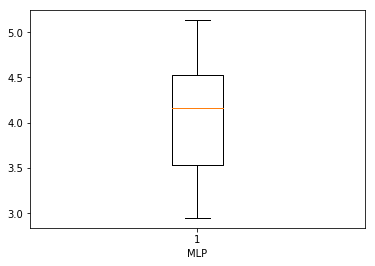

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(scores)
plt.xlabel('MLP')

In [18]:
from sklearn import metrics

maex = metrics.mean_absolute_error(actual['x'],actual['a'])
maey= metrics.mean_absolute_error(actual['y'],actual['b'])
maeauto = (maex + maey)/2

In [19]:
msex = metrics.mean_squared_error(actual['x'],actual['a'])
msey= metrics.mean_squared_error(actual['y'],actual['b'])
msemain = (msex + msey)/2

In [20]:
rmsex = np.sqrt(metrics.mean_squared_error(actual['x'],actual['a']))
rmsey= np.sqrt(metrics.mean_squared_error(actual['y'],actual['b']))
rmsemain = (rmsex + rmsey)/2

In [21]:
print("Mean absolute error : ", maeauto.mean())
print("Mean squared error : ", msemain.mean())
print("Root Mean squared error : ", rmsemain.mean())

Mean absolute error :  2.8772459537883086
Mean squared error :  11.90787315840273
Root Mean squared error :  3.4185381747281776


In [22]:
l2dists_mean, l2dists = l2_dist((preds[:, 0], preds[:, 1]), (Y_test[:, 0] , Y_test[:, 0]))
print(l2dists_mean)

4.377418964260902


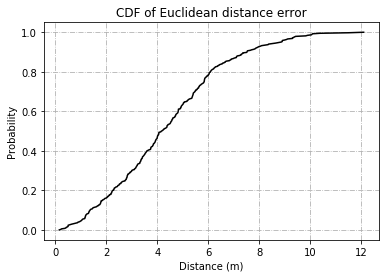

In [23]:
sortedl2_deep = np.sort(l2dists)
prob_deep = 1. * np.arange(len(sortedl2_deep))/(len(sortedl2_deep) - 1)
fig, ax = plt.subplots()
lg1, = ax.plot(sortedl2_deep, prob_deep, color='black')
plt.title('CDF of Euclidean distance error')
plt.xlabel('Distance (m)')
plt.ylabel('Probability')
plt.grid(True)
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')

plt.savefig('Figure_CDF_error.png', dpi=300)
plt.show()
plt.close()